# Imports + Data Cleaning

In [1]:
# Load the data
import pandas as pd
from sklearn import metrics
data = pd.read_csv('data.csv', index_col = 0)
data['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
data.to_csv('data.csv')
del data

In [2]:
import os             
import numpy as np    
import pandas as pd   

In [3]:
data_path  = 'data.csv'

In [4]:
dataframe = pd.read_csv(data_path, index_col=0)

In [5]:
df = dataframe
df = df.drop(['Unnamed: 32'], axis = 1)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt 

# Correlated Data :

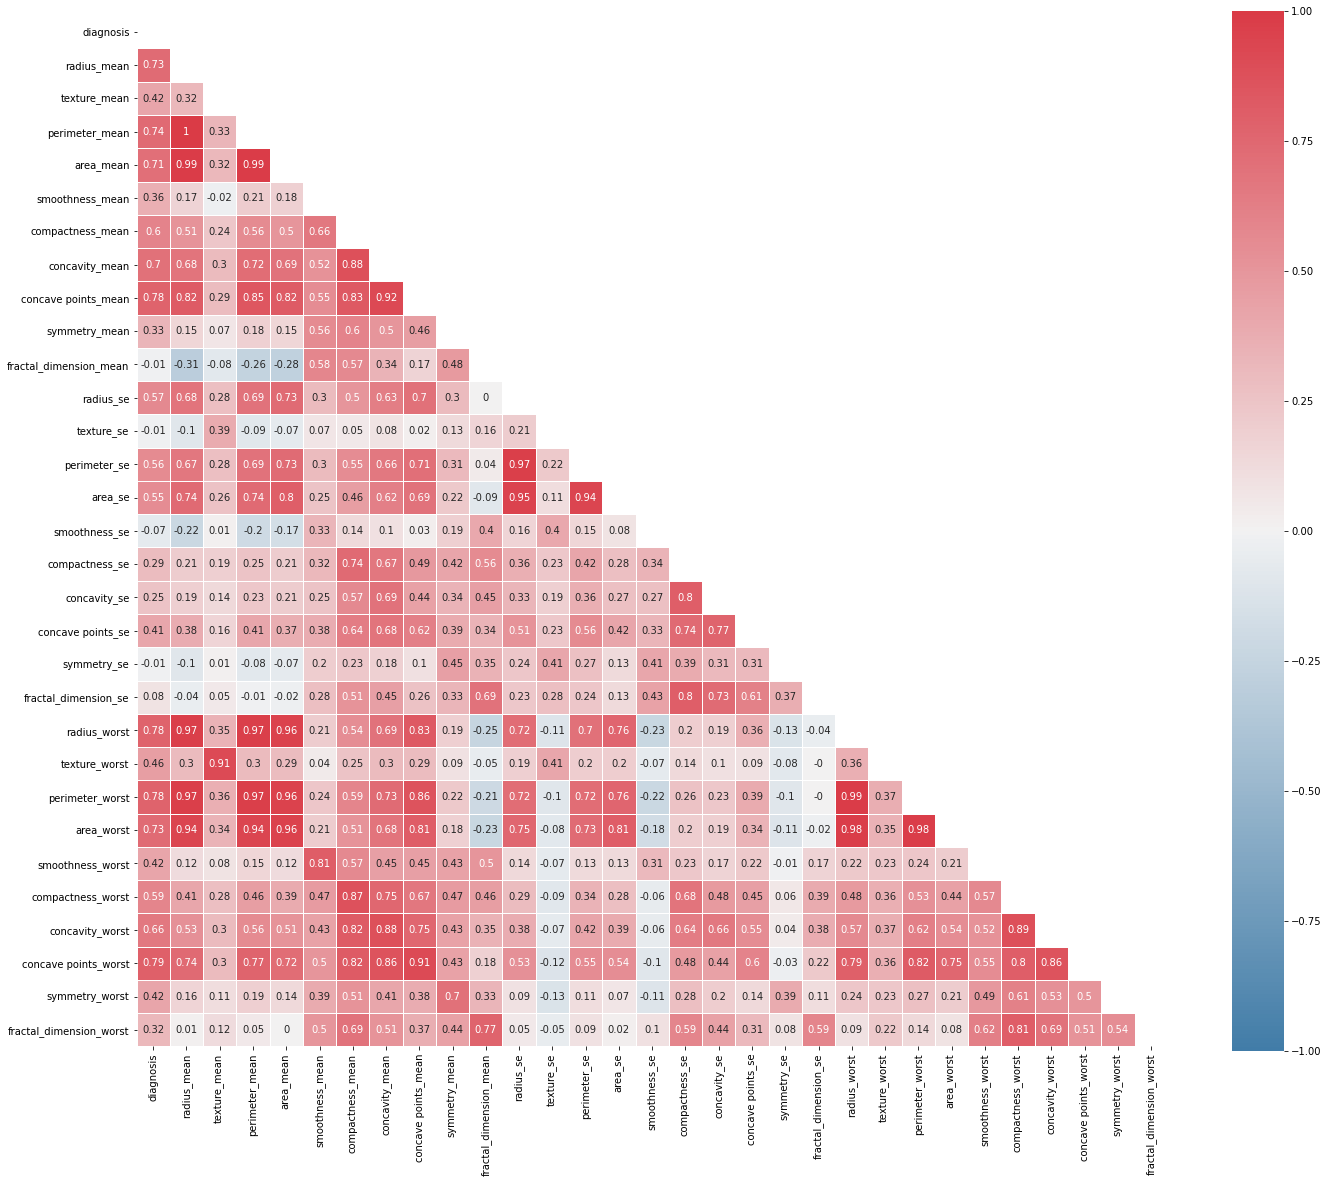

In [7]:
corr = df.corr().round(2)

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(240, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, mask = mask, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75}, annot=True)

plt.tight_layout()

# Cleaning Correlated Data:

In [8]:
to_drop_worst = ['radius_worst', 
                'texture_worst', 
                'perimeter_worst', 
                'area_worst', 
                'smoothness_worst', 
                'compactness_worst', 
                'concavity_worst',
                'concave points_worst', 
                'symmetry_worst', 
                'fractal_dimension_worst']

df = df.drop(to_drop_worst, axis = 1)

to_drop_mean_se = ['perimeter_mean',
                    'perimeter_se', 
                    'area_mean', 
                    'area_se']

df = df.drop(to_drop_mean_se, axis = 1)

to_drop_concave = [ 'concavity_mean',
                    'concavity_se', 
                    'concave points_mean', 
                    'concave points_se']

df = df.drop(to_drop_concave, axis = 1)

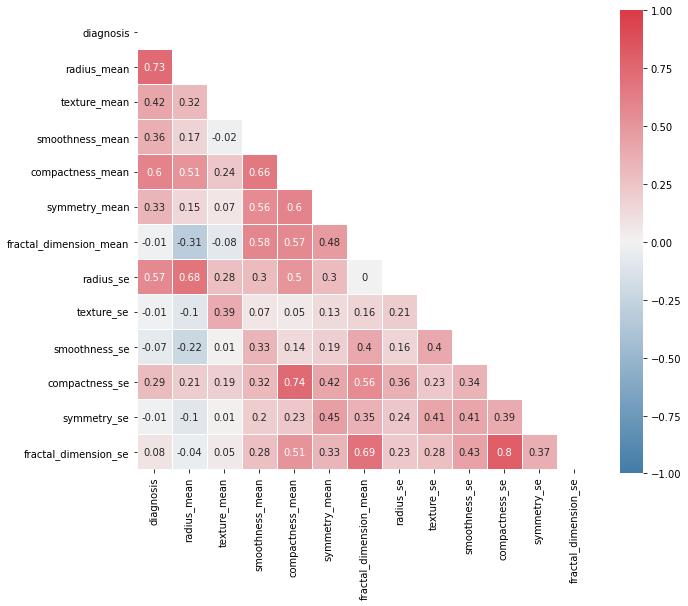

In [9]:
corr = df.corr().round(2)

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))

cmap = sns.diverging_palette(240, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, mask = mask, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75}, annot=True)

plt.tight_layout()

In [10]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

# Logistic Regression Model :

In [11]:
# Let's pull our handy linear fitter from our 'prediction' toolbox: sklearn!
from sklearn import linear_model

In [12]:
y = df['diagnosis']
df = df.drop('diagnosis', axis = 1)
X = df

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=40)

In [14]:
def model_stats(y_test, y_pred):
  print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
  print("Precision: ", metrics.precision_score(y_test, y_pred))
  print("Recall: ", metrics.recall_score(y_test, y_pred))

In [15]:
# Here, we create a 'reg' object that handles the line fitting for us!
model = linear_model.LogisticRegression(C = 9, solver = 'liblinear', max_iter = 500)

In [16]:
model.fit(X_train, y_train)

LogisticRegression(C=9, max_iter=500, solver='liblinear')

In [17]:
y_pred = model.predict(X_test)

In [18]:
model_stats(y_test, y_pred)

Accuracy:  0.9263157894736842
Precision:  0.9239130434782609
Recall:  0.8585858585858586


# Lime :

In [19]:
from lime import lime_tabular

In [20]:
x_t = list(X_test.columns)
X_t = np.array(X_test)

In [21]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data = X_t, 
    class_names=['Malignant (1)', 'Benign (0)'],
    mode='classification', 
    feature_names = x_t)

In [22]:
i = np.random.randint(low = 0, high = len(X_t))

In [23]:
exp = explainer.explain_instance(
    data_row=X_t[i], 
    predict_fn=model.predict_proba
)
exp.show_in_notebook(show_table=True)

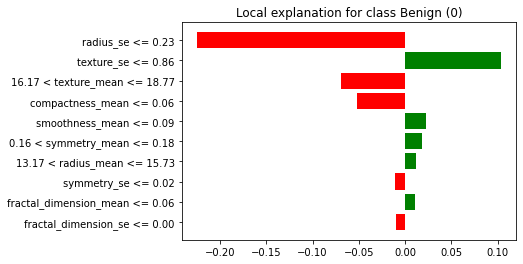

In [24]:
fig = exp.as_pyplot_figure()

# SHAP :

In [25]:
import shap

In [26]:
explainer_shap = shap.Explainer(model, X_test, feature_names = x_t)

In [27]:
shap_values = explainer_shap(X_test)

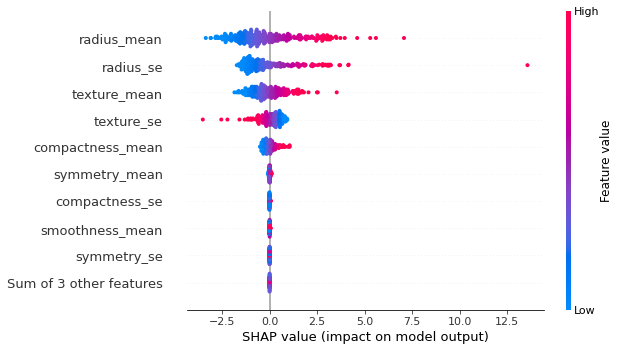

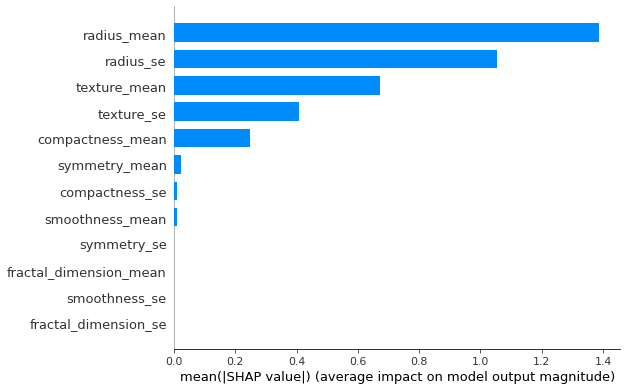

In [28]:
shap.initjs()
shap.plots.beeswarm(shap_values)
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.plots.force(shap_values[i])